In [452]:
import pandas as pd
import matplotlib as plt
from plotnine import *


In [453]:

df = pd.read_csv('year_population_all.csv', encoding = 'utf-8')
df = df.copy()
df.head()
df = df.drop(columns = 'Unnamed: 0',axis=1)

df.head()
df = df[df.iloc[:,2] != '소계']
df = df[df.iloc[:,2] != '합계']


In [248]:
df.head()

,기간,자치구,동,세대,계_계,계_남,계_여,한국인_계,한국인_남,한국인_여,외국인_계,외국인_남,외국인_여,세대당인구,65세이상고령자
2,2008,종로구,사직동,"4,400","10,451","4,941","5,510","9,943","4,683","5,260",508,258,250,2.26,"1,368"
3,2008,종로구,삼청동,"1,684","3,801","1,850","1,951","3,671","1,777","1,894",130,73,57,2.18,589
4,2008,종로구,부암동,"4,607","11,933","5,904","6,029","11,588","5,747","5,841",345,157,188,2.52,"1,433"
5,2008,종로구,평창동,"7,068","19,757","9,620","10,137","19,353","9,424","9,929",404,196,208,2.74,"2,291"
6,2008,종로구,무악동,"3,161","8,693","4,224","4,469","8,607","4,189","4,418",86,35,51,2.72,884


In [37]:
sample = df[df['동'].str.contains('연남|종로1.2.3.4가동|성수[12]가제[13]동|행운동|봉천동|망원|삼청|명동|상도|목|신정제|상계|중계|명일', regex=True)]
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 3 to 4508
Data columns (total 15 columns):
기간          361 non-null int64
자치구         361 non-null object
동           361 non-null object
세대          361 non-null object
계_계         361 non-null object
계_남         361 non-null object
계_여         361 non-null object
한국인_계       361 non-null object
한국인_남       361 non-null object
한국인_여       361 non-null object
외국인_계       361 non-null object
외국인_남       361 non-null object
외국인_여       361 non-null object
세대당인구       361 non-null object
65세이상고령자    361 non-null object
dtypes: int64(1), object(14)
memory usage: 45.1+ KB


In [505]:
df['hot'] = df['동']
# df.loc[df.iloc[:,2].str.contains(r'(연남|종로1.2.3.4가동|성수[12]가제[13]동|행운동|봉천동|망원)'), 'hot'] = 'Hot'
df.loc[df.iloc[:,2].str.contains(r'(삼청|명동|목)'),  'hot'] = 'Old_hot'
df.loc[df.iloc[:,2].str.contains(r'(연남|종로1.2.3.4가동|성수[12]가제[13]동|행운동|봉천동|망원|삼청|명동|목)')==False, 'hot'] = 'Not_hot'
# df.loc[df.iloc[:,2].str.contains(r'(합계)'),'hot'] = 'Sum'

C:\Users\lunar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lunar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [506]:
df

,기간,자치구,동,세대,계_계,계_남,계_여,한국인_계,한국인_남,한국인_여,외국인_계,외국인_남,외국인_여,세대당인구,65세이상고령자,hot
2,2008,종로구,사직동,"4,400","10,451","4,941","5,510","9,943","4,683","5,260",508,258,250,2.26,"1,368",Not_hot
3,2008,종로구,삼청동,"1,684","3,801","1,850","1,951","3,671","1,777","1,894",130,73,57,2.18,589,Old_hot
4,2008,종로구,부암동,"4,607","11,933","5,904","6,029","11,588","5,747","5,841",345,157,188,2.52,"1,433",Not_hot
5,2008,종로구,평창동,"7,068","19,757","9,620","10,137","19,353","9,424","9,929",404,196,208,2.74,"2,291",Not_hot
6,2008,종로구,무악동,"3,161","8,693","4,224","4,469","8,607","4,189","4,418",86,35,51,2.72,884,Not_hot
7,2008,종로구,교남동,"4,394","9,407","4,595","4,812","9,163","4,484","4,679",244,111,133,2.09,"1,106",Not_hot
8,2008,종로구,가회동,"2,510","6,044","2,910","3,134","5,850","2,825","3,025",194,85,109,2.33,800,Not_hot
9,2008,종로구,종로1.2.3.4가동,"4,437","8,645","4,852","3,793","7,242","4,105","3,137","1,403",747,656,1.63,"1,247",종로1.2.3.4가동
10,2008,종로구,종로5·6가동,"3,014","6,839","3,613","3,226","6,481","3,458","3,023",358,155,203,2.15,841,Not_hot
11,2008,종로구,이화동,"4,539","10,495","5,074","5,421","9,585","4,638","4,947",910,436,474,2.11,939,Not_hot


In [507]:
df.head()

,기간,자치구,동,세대,계_계,계_남,계_여,한국인_계,한국인_남,한국인_여,외국인_계,외국인_남,외국인_여,세대당인구,65세이상고령자,hot
2,2008,종로구,사직동,"4,400","10,451","4,941","5,510","9,943","4,683","5,260",508,258,250,2.26,"1,368",Not_hot
3,2008,종로구,삼청동,"1,684","3,801","1,850","1,951","3,671","1,777","1,894",130,73,57,2.18,589,Old_hot
4,2008,종로구,부암동,"4,607","11,933","5,904","6,029","11,588","5,747","5,841",345,157,188,2.52,"1,433",Not_hot
5,2008,종로구,평창동,"7,068","19,757","9,620","10,137","19,353","9,424","9,929",404,196,208,2.74,"2,291",Not_hot
6,2008,종로구,무악동,"3,161","8,693","4,224","4,469","8,607","4,189","4,418",86,35,51,2.72,884,Not_hot


In [508]:
sample = df[df['동'].str.contains('연남|종로1.2.3.4가동|성수[12]|행운동|봉천동|망원', regex=True)]
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 9 to 4415
Data columns (total 16 columns):
기간          90 non-null int64
자치구         90 non-null object
동           90 non-null object
세대          90 non-null object
계_계         90 non-null object
계_남         90 non-null object
계_여         90 non-null object
한국인_계       90 non-null object
한국인_남       90 non-null object
한국인_여       90 non-null object
외국인_계       90 non-null object
외국인_남       90 non-null object
외국인_여       90 non-null object
세대당인구       90 non-null object
65세이상고령자    90 non-null object
hot         90 non-null object
dtypes: int64(1), object(15)
memory usage: 12.0+ KB


# hot 그룹별 분석

In [514]:
def str_to_float(x):
    try:
        return float(x.replace(',',''))
    except:
        return x
    

In [515]:
sample_hot = df[['동','기간','65세이상고령자','hot']].copy()

columns = sample_hot.columns
for column in columns:
    sample_hot[column] = sample_hot[column].apply(lambda x:str_to_float(x))


In [513]:
sample_hot

,동,기간,65세이상고령자,hot
2,사직동,2008,1368,Not_hot
3,삼청동,2008,589,Old_hot
4,부암동,2008,1433,Not_hot
5,평창동,2008,2291,Not_hot
6,무악동,2008,884,Not_hot
7,교남동,2008,1106,Not_hot
8,가회동,2008,800,Not_hot
9,종로1.2.3.4가동,2008,1247,종로1.2.3.4가동
10,종로5·6가동,2008,841,Not_hot
11,이화동,2008,939,Not_hot


In [519]:
sample_hot.pivot_table(values = ['65세이상고령자'],index = ['동'],columns=['기간'])
sample_hot.info()

DataError: No numeric types to aggregate

In [494]:
sample_hot_pivot = sample_hot.pivot_table('65세이상고령자','동','기간')

## 선그래프그리기 

In [496]:
sample_hot_pivot = sample_hot_pivot.T
sample_hot_pivot.melt
sample_hot_pivot

동,망원1동,망원2동,성수1가1동,성수1가2동,성수2가1동,성수2가3동,연남동,종로1.2.3.4가동,행운동
기간,,,,,,,,,
2008,2251.0,1875.0,1391.0,1510.0,1672.0,1091.0,2088.0,1247.0,2406.0
2009,2357.0,1986.0,1437.0,1571.0,1841.0,1128.0,2204.0,1277.0,2529.0
2010,2508.0,2112.0,1509.0,1629.0,1964.0,1198.0,2325.0,1528.0,2732.0
2011,2614.0,2249.0,1582.0,1716.0,2040.0,1283.0,2373.0,1552.0,2865.0
2012,2763.0,2377.0,1703.0,1786.0,2145.0,1375.0,2423.0,1656.0,3104.0
2013,2883.0,2472.0,1761.0,1880.0,2230.0,1426.0,2468.0,1697.0,3294.0
2014,2956.0,2520.0,1812.0,1918.0,2325.0,1498.0,2495.0,1736.0,3444.0
2015,3001.0,2600.0,1855.0,1930.0,2453.0,1567.0,2457.0,1788.0,3590.0
2016,3049.0,2679.0,1865.0,1943.0,2490.0,1566.0,2400.0,1814.0,3729.0


In [521]:
samplehot = sample_hot.melt(id_vars=['기간','동'],value_vars=['65세이상고령자'])
samplehot = samplehot.groupby(['기간','동']).mean()
samplehot = pd.DataFrame(samplehot.to_records())

samplehot

DataError: No numeric types to aggregate

C:\Users\lunar\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\lunar\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\lunar\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


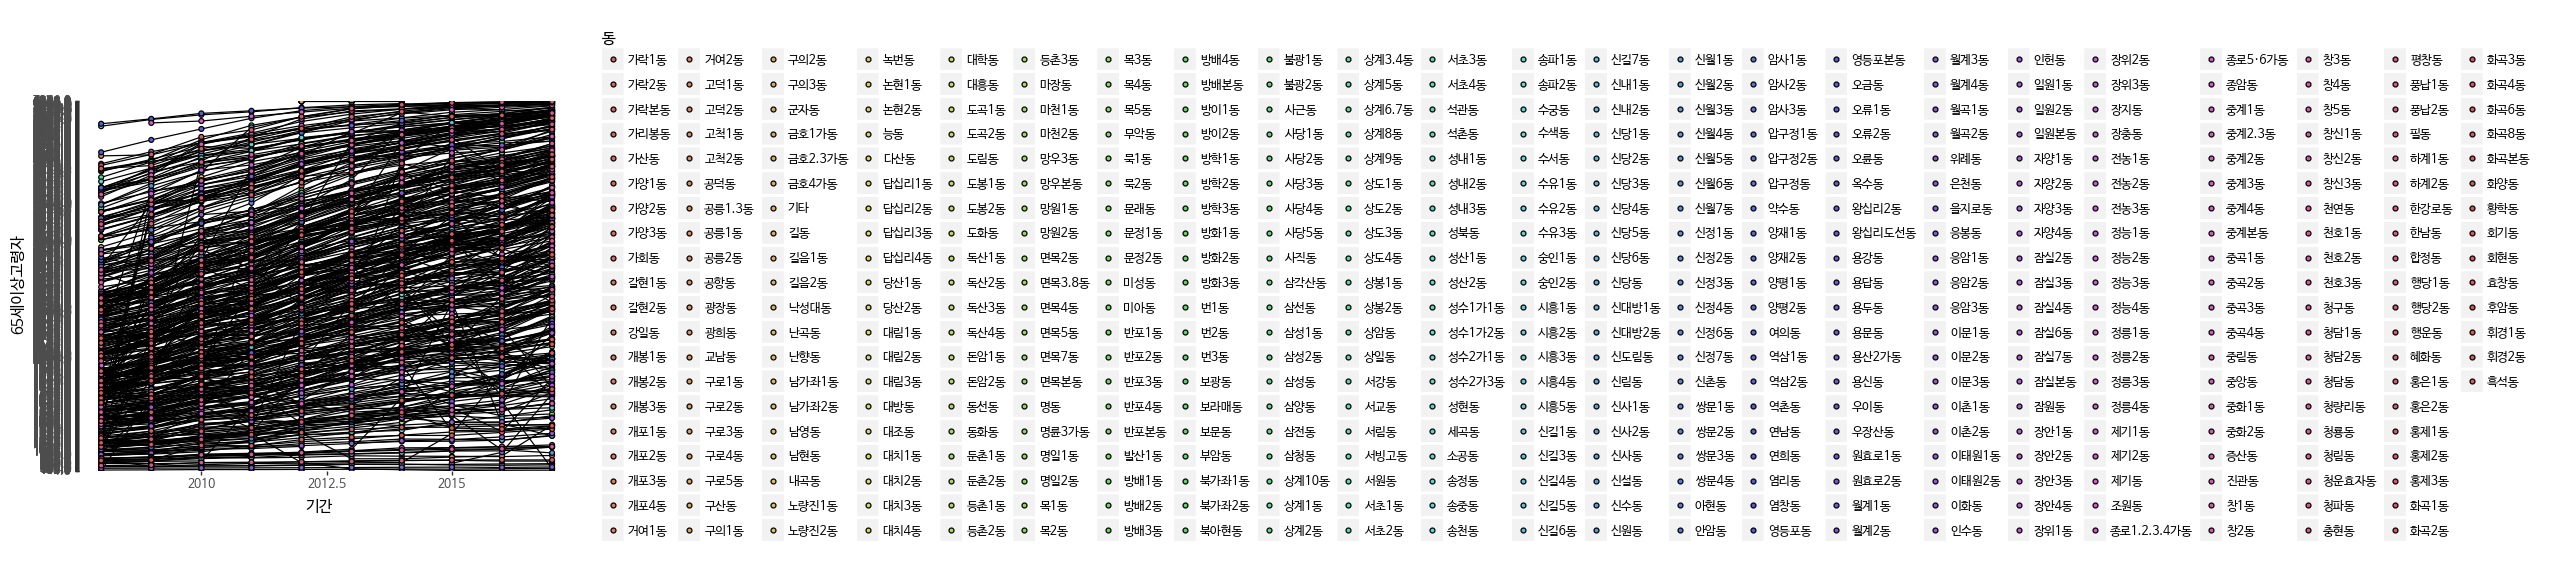

<ggplot: (44963461931)>

In [520]:
(ggplot(sample_hot, aes(x='기간', y='65세이상고령자', group='동' ,fill='동'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

## 증감률 그래프그리기

In [259]:
df.head()

,기간,자치구,동,세대,계_계,계_남,계_여,한국인_계,한국인_남,한국인_여,외국인_계,외국인_남,외국인_여,세대당인구,65세이상고령자,hot
2,2008,종로구,사직동,"4,400","10,451","4,941","5,510","9,943","4,683","5,260",508,258,250,2.26,"1,368",Not_hot
3,2008,종로구,삼청동,"1,684","3,801","1,850","1,951","3,671","1,777","1,894",130,73,57,2.18,589,Old_hot
4,2008,종로구,부암동,"4,607","11,933","5,904","6,029","11,588","5,747","5,841",345,157,188,2.52,"1,433",Not_hot
5,2008,종로구,평창동,"7,068","19,757","9,620","10,137","19,353","9,424","9,929",404,196,208,2.74,"2,291",Not_hot
6,2008,종로구,무악동,"3,161","8,693","4,224","4,469","8,607","4,189","4,418",86,35,51,2.72,884,Not_hot


In [457]:
sample.head()

,기간,자치구,동,세대,계_계,계_남,계_여,한국인_계,한국인_남,한국인_여,외국인_계,외국인_남,외국인_여,세대당인구,65세이상고령자
9,2008,종로구,종로1.2.3.4가동,"4,437","8,645","4,852","3,793","7,242","4,105","3,137","1,403",747,656,1.63,"1,247"
238,2008,마포구,망원1동,"10,236","25,127","12,418","12,709","24,611","12,192","12,419",516,226,290,2.4,"2,251"
239,2008,마포구,망원2동,"8,384","21,578","10,609","10,969","21,494","10,574","10,920",84,35,49,2.56,"1,875"
240,2008,마포구,연남동,"8,882","20,823","10,123","10,700","19,763","9,596","10,167","1,060",527,533,2.23,"2,088"
353,2008,관악구,행운동,"14,864","30,706","15,376","15,330","30,397","15,238","15,159",309,138,171,2.05,"2,406"


In [272]:

before_seoul = sample.drop('hot', axis=1)

In [277]:

before_seoul.drop('2017', axis =1, inplace=True)
before_seoul.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,21375.800000,21375.400000,21467.000000,21335.800000,21080.800000,20852.600000,20692.600000,20374.200000,20136.600000
1,23837.588095,24679.980296,24953.884236,24851.039409,24292.342233,24287.748780,24377.392157,24330.413793,24111.689655
2,25951.384615,25930.923077,25910.384615,25582.538462,25275.153846,25062.692308,24627.230769,24393.769231,24156.000000


In [278]:
after_seoul = rate.drop('hot', axis=1)
after_seoul.drop('2008', axis=1, inplace=True)
after_seoul.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,21375.400000,21467.000000,21335.800000,21080.800000,20852.600000,20692.600000,20374.200000,20136.600000,19720.200000
1,24679.980296,24953.884236,24851.039409,24292.342233,24287.748780,24377.392157,24330.413793,24111.689655,23929.445813
2,25930.923077,25910.384615,25582.538462,25275.153846,25062.692308,24627.230769,24393.769231,24156.000000,23894.076923


In [279]:
import numpy as np

In [344]:

seoul_pops_rate = pd.DataFrame(np.round((after_seoul.values - before_seoul.values) * 100 / before_seoul.values, 3))
col_list = [str(num)+'~'+str(num+1) for num in range(2008, 2017)]
seoul_pops_rate.columns = col_list
final_rate = pd.DataFrame()
final_rate['hot'] = rate['hot'].copy(deep=True)
final_rate = final_rate.join(seoul_pops_rate)
final_rate.head()

,hot,2008~2009,2009~2010,2010~2011,2011~2012,2012~2013,2013~2014,2014~2015,2015~2016,2016~2017
0,Hot,-0.002,0.429,-0.611,-1.195,-1.083,-0.767,-1.539,-1.166,-2.068
1,Not_hot,3.534,1.110,-0.412,-2.248,-0.019,0.369,-0.193,-0.899,-0.756
2,Old_hot,-0.079,-0.079,-1.265,-1.202,-0.841,-1.737,-0.948,-0.975,-1.084


In [345]:
final_rate = final_rate.melt(id_vars=['hot'])

In [348]:
final_rate.head()

,hot,variable,value
0,Hot,2008~2009,-0.002
1,Not_hot,2008~2009,3.534
2,Old_hot,2008~2009,-0.079
3,Hot,2009~2010,0.429
4,Not_hot,2009~2010,1.110


C:\Users\lunar\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\lunar\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\lunar\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


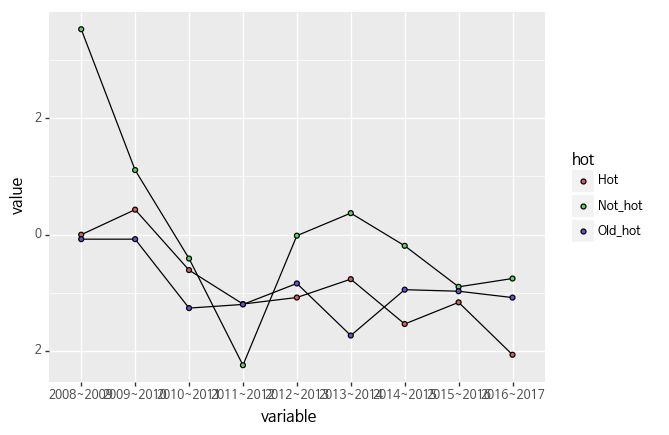

<ggplot: (45094197964)>

In [347]:
(ggplot(final_rate, aes(x='variable', y='value',group='hot' ,fill='hot'))
 + geom_line()
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


Hot은 샤로수길, 익선동 등 핫하다고 생각하는 지역, Old_hot은 명동, 신사 등 기존 도심지역, Not_hot은 이 모두를 제외한 서울 전체 동이다. 
증감률 그래프를 그려본 결과 최근 3개년의 거주인구수는 세 지역 모두 감소추세를 보였다. 이는 서울 전체 주거인구의 감소추세를 반영한다. Hot과 Old_hot지역의 감소추세는 최근 10년간 일정한 패턴을 그린다. 꾸준히 거주인구가 감소하고 있으며 Not_hot지역에 비해 감소율이 크다.

최근 10년간 Hot지역은 Not_hot지역에 비해 거주 인구 감소율이 컸던 지역이다. Rookie 분석에서, Rookie는 Not_hot지역과는 10년 전부터 차이를 보였음을 염두에 둬야할 것이다.  

2011~2012년 데이터가 수상하여 찾아본 결과, 수도권은 1970년 이후 지속적으로 거주인구가 감소하다가 2011년 최초로 8000면의 순유출이 일어났다. 특히, 서울지역은 전국대비 순유출률이 가장 높았고, 이 인구의 60.3% 경기로 이전했다. 2012년에도 서울은 전국 순유출율 1위를 차지했다. 

언론에서는 이를 인구절벽이 아닌 사회적감소로 해석한다. 즉, 인구의 감소가 아니라 경기도에 양질의 주택이 늘어나고 사회적인프라가 갖춰지면서 생긴변화라고 볼 수 있다. 서울시 내부의 인구이동도 양질의 주택공급 + 사회적인프라를 요인으로 분석해볼 필요성을 느낀다.

특이할 점은 2014년 이후 Hot지역의 인구감소가 Old_hot지역에 비해 더 빠르게 나타나고 있다는 점이다. 2012년 Hot 지역의 인구감소율은 Old_hot지역을 넘어선다. 2013년 다시 Old_hot지역이 더 빠르게 감소하지만, 이는 2014년 이후 역전되어 Hot지역의 감소율이 더 빨라지고 있음을 알 수 있다. 

또한, 흥미로운 점은 Not_hot과 hot은 과거 10년간 동일한 패턴의 인구증감률을 보이다, 2014년 이후 분기하여 반대의 양상을 보인다는 점이다. 거주 이전의 양상에 대해 더알아볼 필요가 있다. 



# 거주 이전 양상

거주지를 옮기는 요인은 다양하다. 다양한 요인중에서도 이번 분석에서는 Hot 지역을 요인으로 거주지 이전의 양상을 살펴보고자한다. 서울시 전체동의 인구증감률을 살펴본뒤, 최근 3개년간 빠르게 감소하기 시작한 Hot지역의 거주인구들이 어디로 갔는지 찾아보고자한다. 

추적이 어렵다면 Plan B는 최근 3개년간 거주인구가 증가한 지역을 살펴보고 이 지역과 Hot지역의 상관관계를 찾아보고자한다. 통계청의 인구이동데이터를 참고한다. 